In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df= pd.read_csv('Covid Dataset.csv')

In [ ]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
df.shape

(5434, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
df.isnull().sum()

,0
Breathing Problem,0
Fever,0
Dry Cough,0
Sore throat,0
Running Nose,0
Asthma,0
Chronic Lung Disease,0
Headache,0
Heart Disease,0
Diabetes,0


In [ ]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [ ]:
df.drop(columns=['Wearing Masks','Sanitization from Market'],inplace=True)

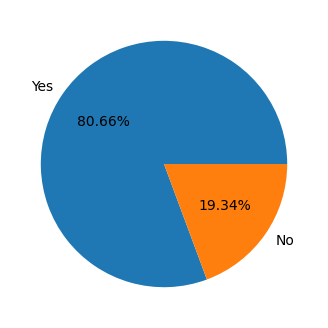

In [ ]:
plt.figure(figsize=(5,4))
plt.pie(x=df['COVID-19'].value_counts(),labels=df['COVID-19'].value_counts().index,autopct='%1.2f%%')
plt.show()

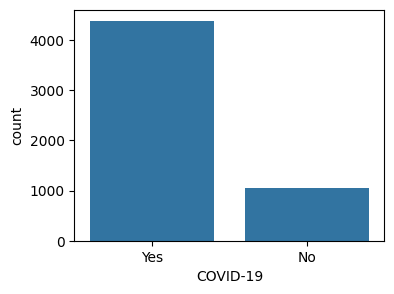

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='COVID-19',data=df)
plt.show()

In [ ]:
cat_features=[x for x in df.columns if df[x].dtype=='object']
len(cat_features)

19

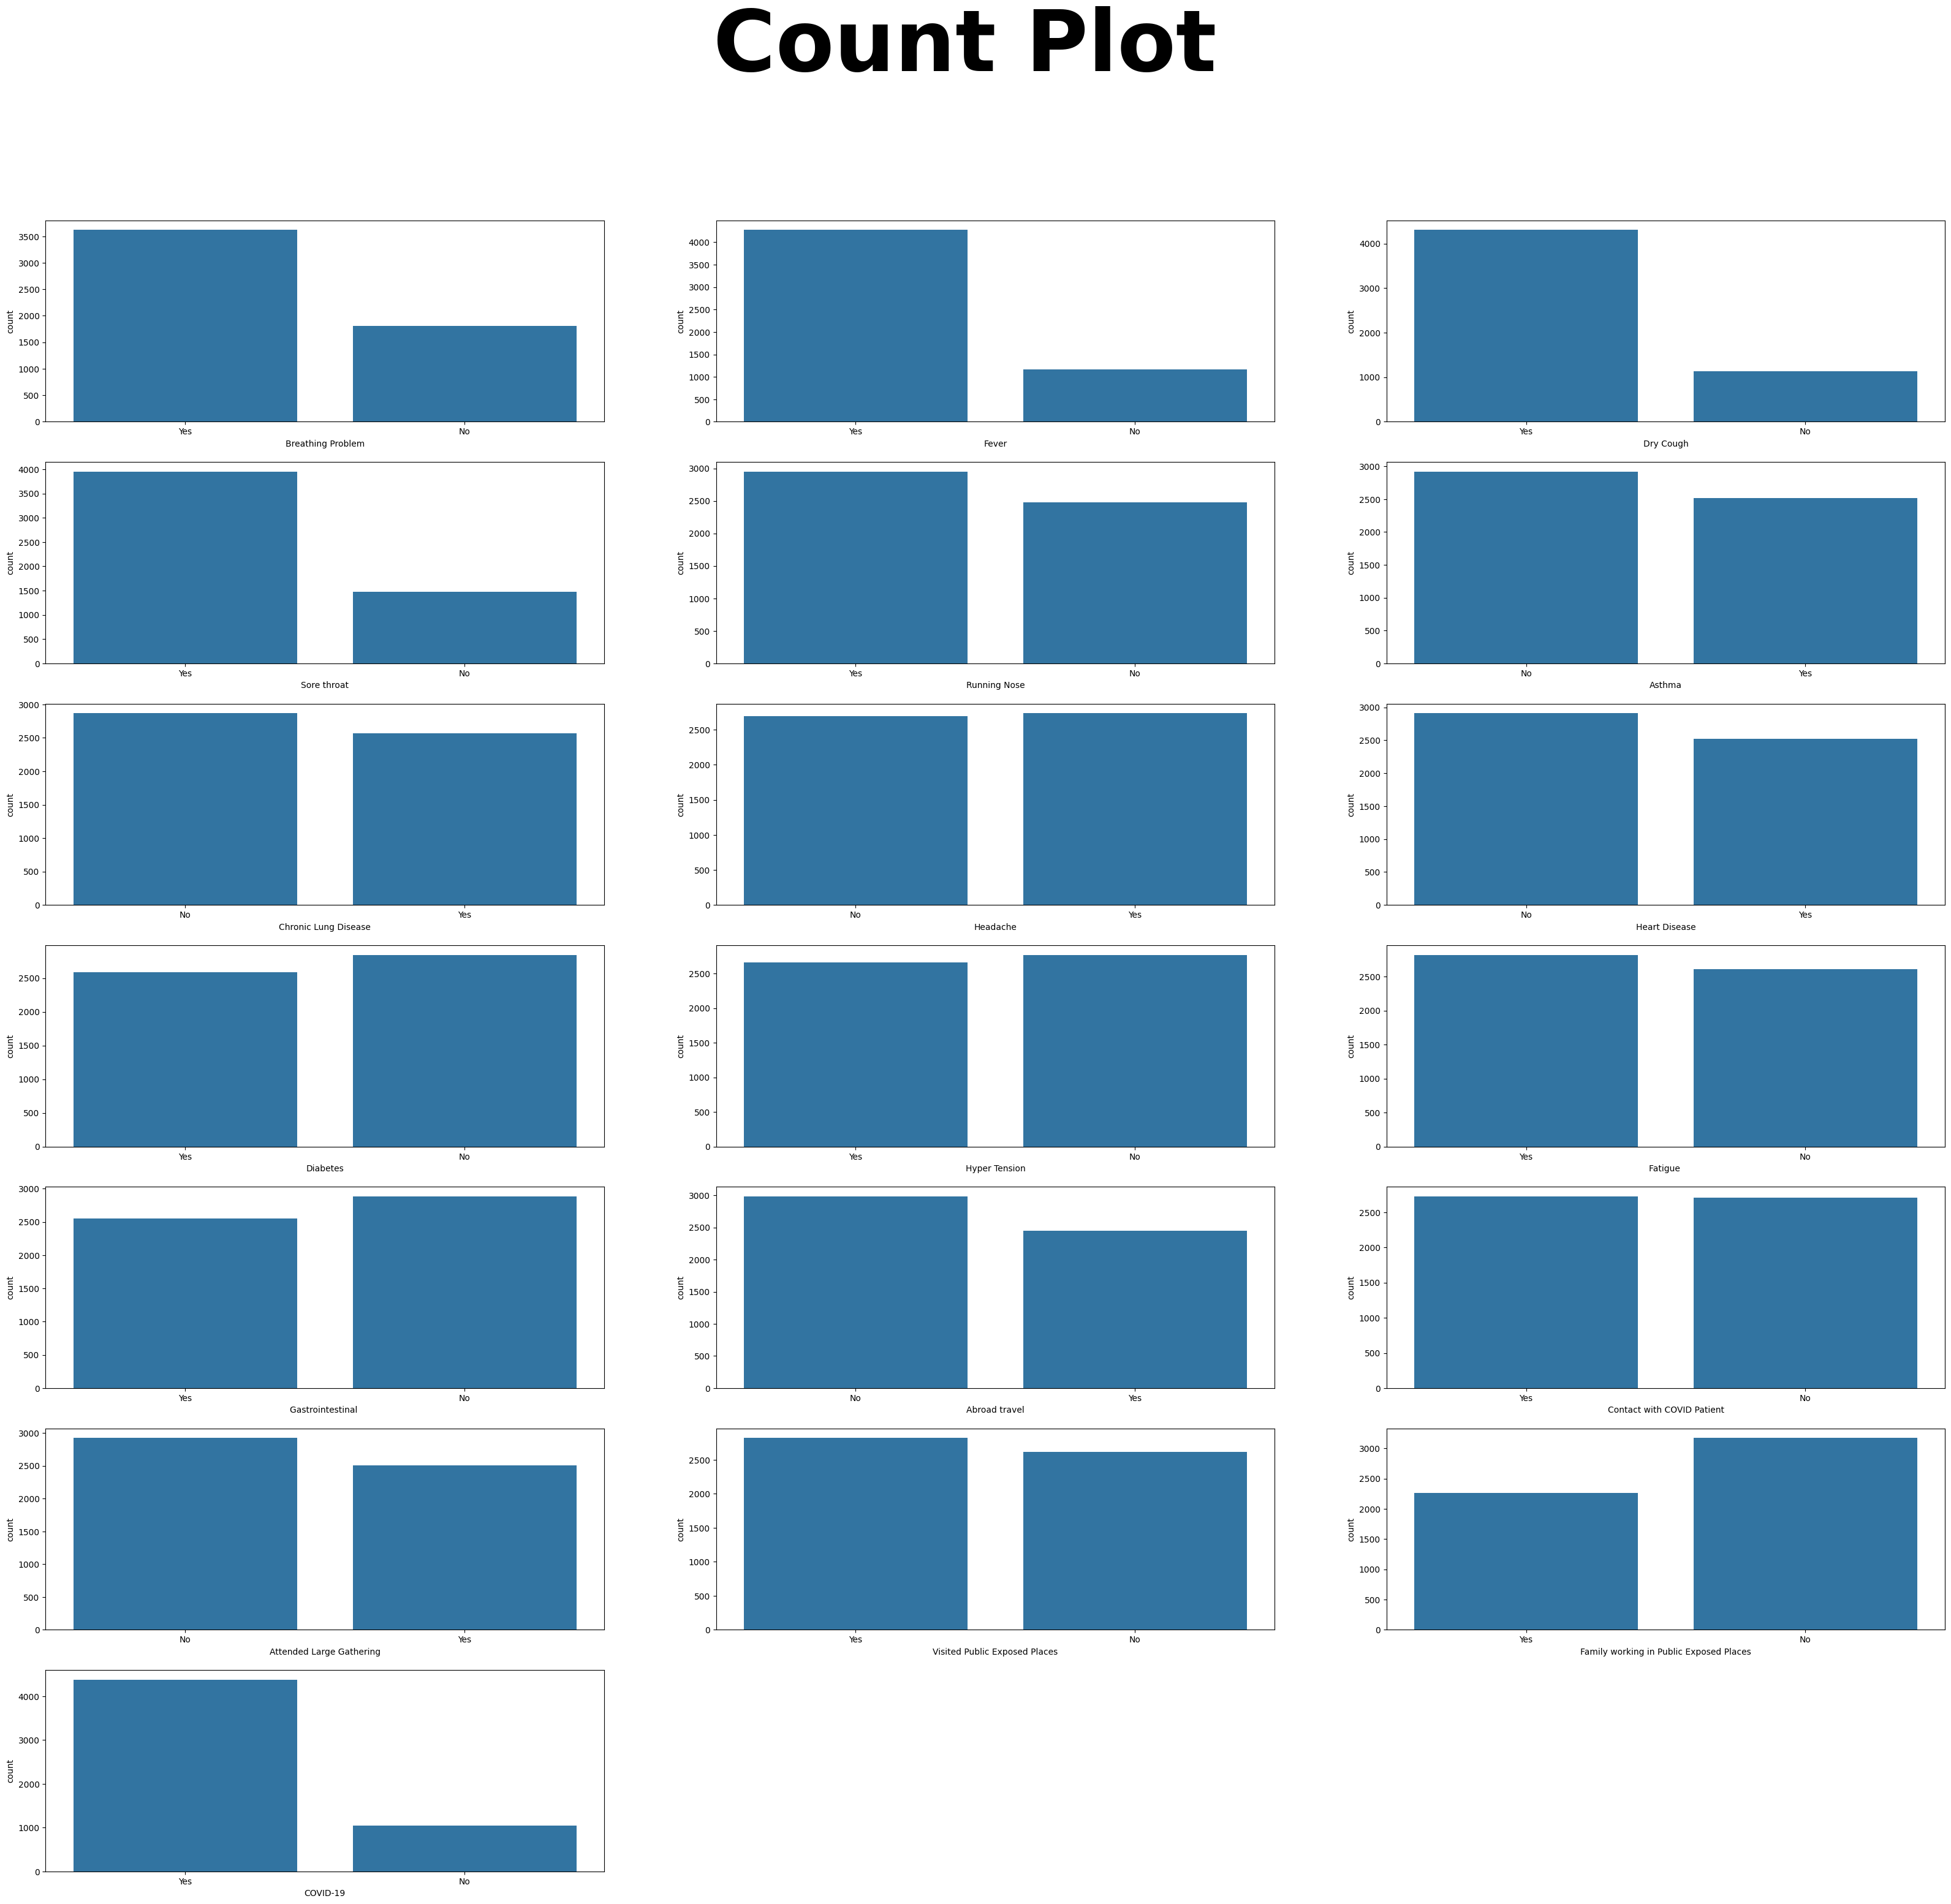

In [ ]:
plt.figure(figsize=(40,35))
plt.suptitle("Count Plot",fontsize=100, fontweight="bold")
for i in range(0,len(cat_features)):
    plt.subplot(7,3,i+1)
    sns.countplot(x=cat_features[i],data=df)
    plt.xlabel(cat_features[i])
    plt.subplots_adjust()

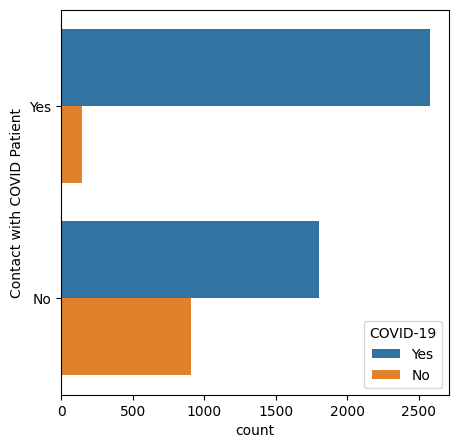

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,y='Contact with COVID Patient',hue='COVID-19')
plt.show()

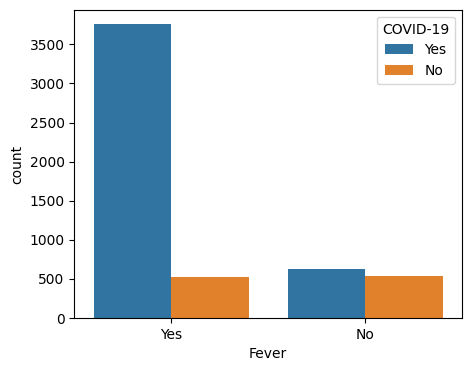

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Fever',hue='COVID-19',data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder= LabelEncoder()

In [ ]:
for i in df.columns:
    df[i]=label_encoder.fit_transform(df[i])

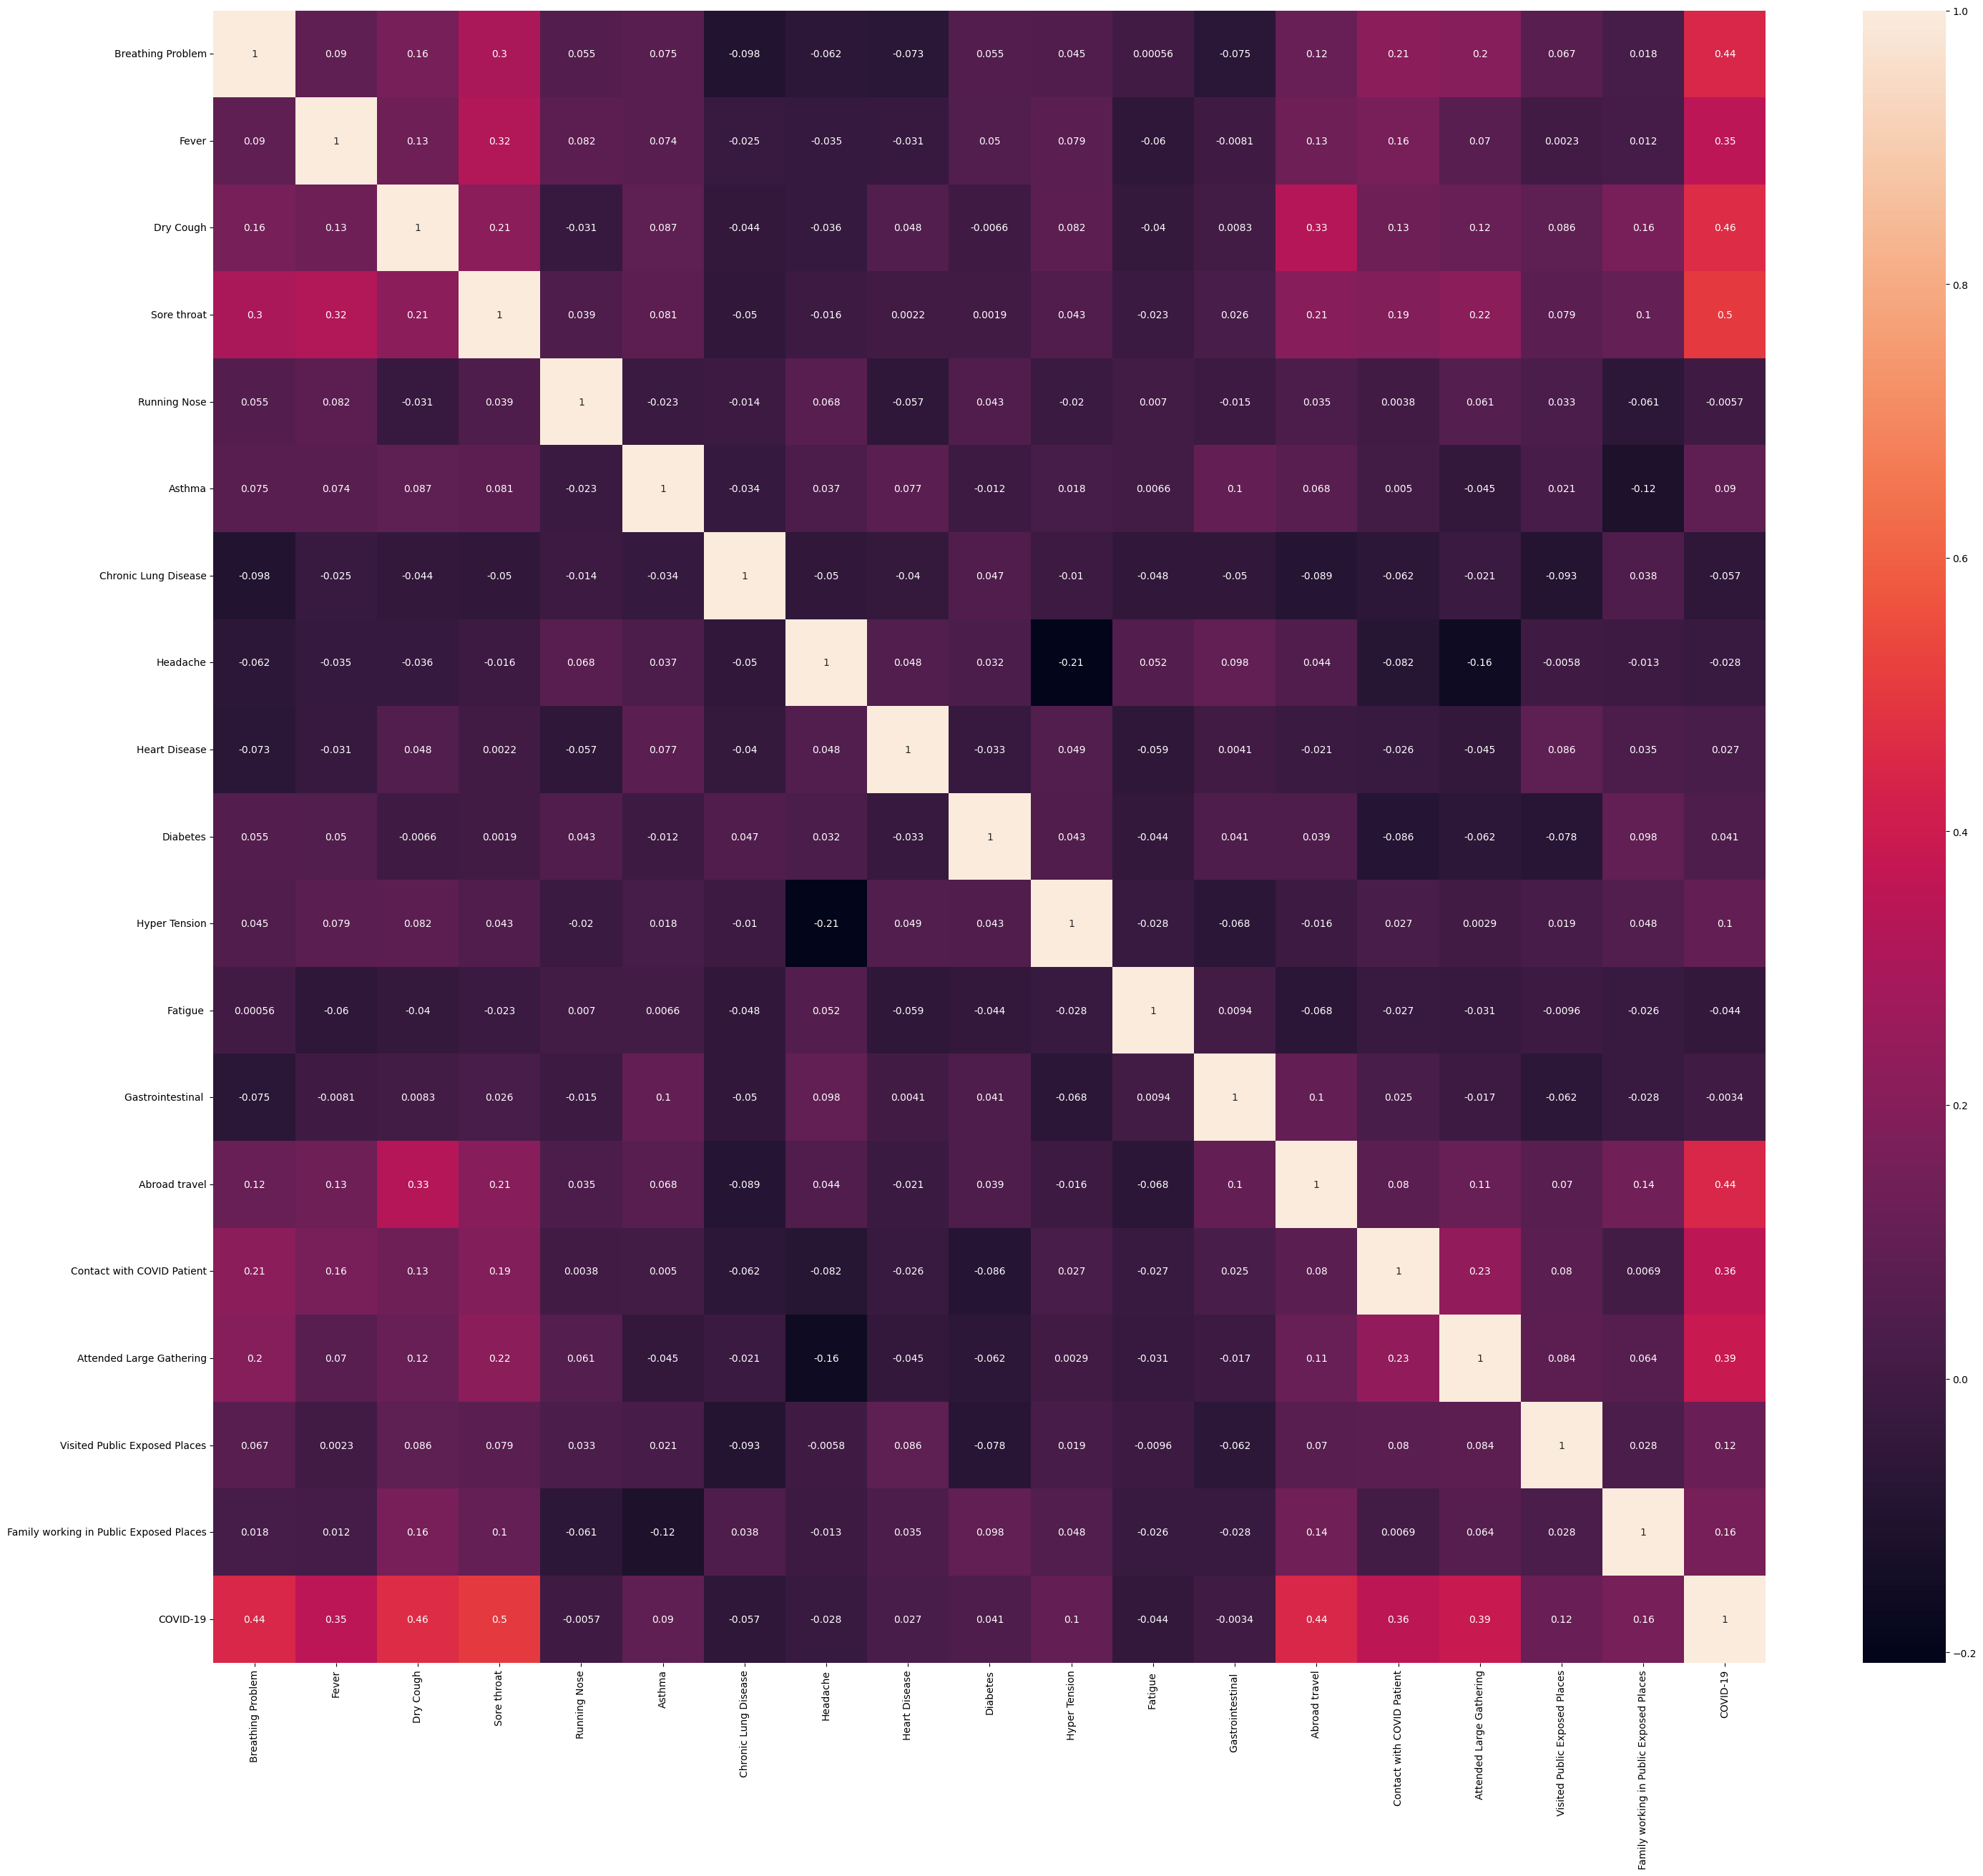

In [ ]:
plt.figure(figsize=(35,30))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['COVID-19'])
y=df['COVID-19']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(4347, 18)

In [ ]:
y_train.shape

(4347,)

In [ ]:
x_test.shape

(1087, 18)

In [ ]:
y_test.shape

(1087,)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [ ]:
y_pred=lrf.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc =accuracy_score(y_test,y_pred)

In [ ]:
acc

0.9724011039558418

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[181,  22],
       [  8, 876]])

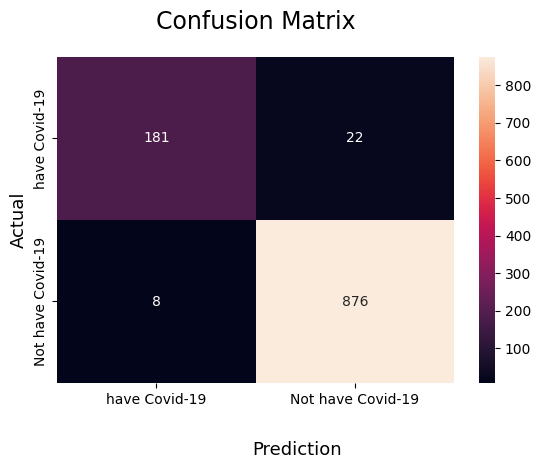

In [ ]:
sns.heatmap(cm, annot=True,fmt='g', xticklabels=['have Covid-19','Not have Covid-19'],yticklabels=['have Covid-19','Not have Covid-19'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       203
           1       0.98      0.99      0.98       884

    accuracy                           0.97      1087
   macro avg       0.97      0.94      0.95      1087
weighted avg       0.97      0.97      0.97      1087



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
x_test = np.ascontiguousarray(x_test)

In [ ]:
y_pred2=knc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred2

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
knn_acc = accuracy_score(y_test,y_pred2)
knn_acc

0.9751609935602575

In [ ]:
cm2 = confusion_matrix(y_test,y_pred2)

In [ ]:
cm2

array([[201,   2],
       [ 25, 859]])

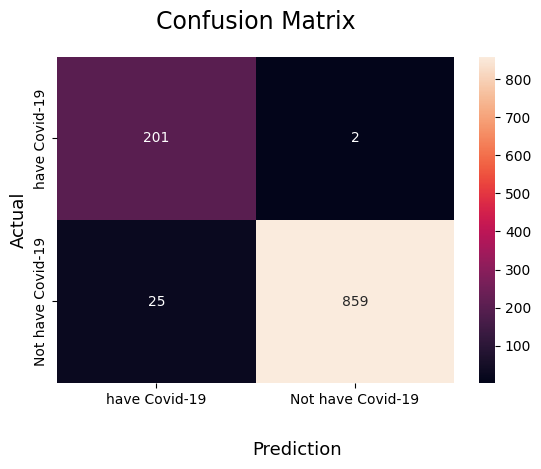

In [ ]:
sns.heatmap(cm2, annot=True,fmt='g', xticklabels=['have Covid-19','Not have Covid-19'],yticklabels=['have Covid-19','Not have Covid-19'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       203
           1       1.00      0.97      0.98       884

    accuracy                           0.98      1087
   macro avg       0.94      0.98      0.96      1087
weighted avg       0.98      0.98      0.98      1087



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred3 = rfc.predict(x_test)
y_pred3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
rfc_acc = accuracy_score(y_test,y_pred3)
rfc_acc

0.984360625574977

In [ ]:
cm3 = confusion_matrix(y_test,y_pred3)
cm3

array([[198,   5],
       [ 12, 872]])

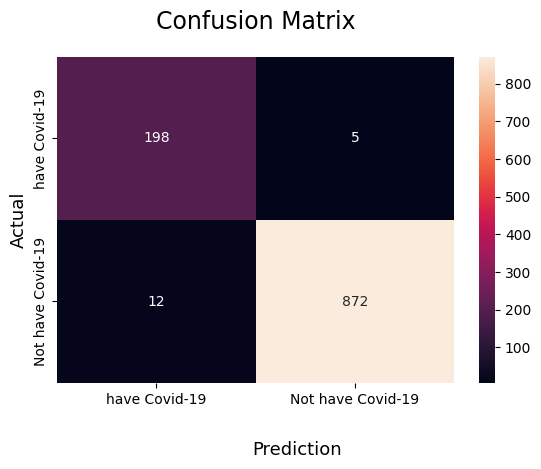

In [ ]:
sns.heatmap(cm3, annot=True,fmt='g', xticklabels=['have Covid-19','Not have Covid-19'],yticklabels=['have Covid-19','Not have Covid-19'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087

